### Домашнее задание к лекции «Алгоритмы кластеризации»

###### Данные
В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:

geo_comment.xlsx
comment - комментарий одного или списка жителей к проект
multiplier - количество авторов комментария (может быть 1, может быть список)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)
geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть multiplier > 1 голоса)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)
###### Обязательное задание
визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
аналогично исследовать скопления голосов за и против отдельно
подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
приложить ноутбук
###### Дополнительные задания
найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')
для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

######  Конвертируем excel файл в csv для ускорения работы

In [2]:
xls = pd.ExcelFile('geo.xlsx')
data = xls.parse(sheetname="Sheet1", index_col=None, na_values=['NA'])
data.to_csv('geo.csv')


###### Загружаем и смотрим данные

In [3]:
data = pd.read_csv('geo.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,x,y,comment_class
0,0,0,37.612416,55.777454,-1
1,1,1,37.612416,55.777454,-1
2,2,2,37.603298,55.742108,-1
3,3,3,37.558526,55.728758,-1
4,4,4,37.566431,55.731794,-1


######  Оставляем только интересующие нас столбцы X и Y в новом датасете

In [4]:
xy_data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'comment_class'], axis='columns')
xy_data.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


###### Кластеризация

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(xy_data)

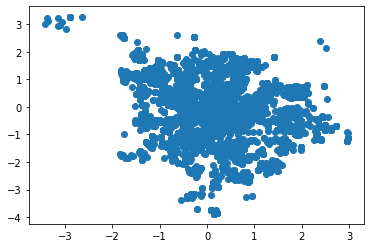

In [6]:
## Визуально делим город на районы безотносительно голосов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [7]:
### Смотрим оптимальное число кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
    
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

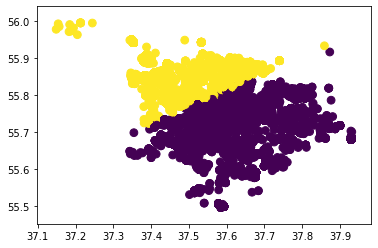

In [8]:
### При полученном кличестве кластеров 2, лучше получается при 4.
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(data['x'], data['y'], cmap='viridis', c=clusters, s=60)
plt.show()

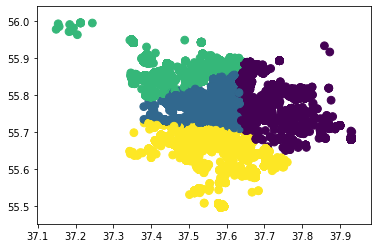

In [9]:
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(data['x'], data['y'], cmap='viridis', c=clusters, s=60)
plt.show()

###### Скопления голосов ЗА

In [10]:
data.head()

,Unnamed: 0,Unnamed: 0.1,x,y,comment_class
0,0,0,37.612416,55.777454,-1
1,1,1,37.612416,55.777454,-1
2,2,2,37.603298,55.742108,-1
3,3,3,37.558526,55.728758,-1
4,4,4,37.566431,55.731794,-1


In [11]:
agreed = data[data.comment_class == 1]
agreed.head()

,Unnamed: 0,Unnamed: 0.1,x,y,comment_class
28,28,28,37.588916,55.741982,1
45,45,45,37.589311,55.734273,1
46,46,46,37.558526,55.728758,1
47,47,47,37.566431,55.731794,1
61,61,61,37.589311,55.734273,1


In [12]:
agreed = agreed[['x', 'y']]

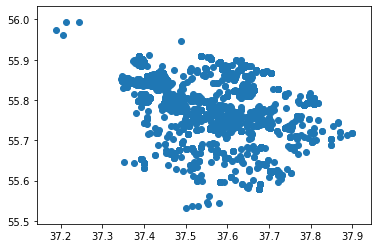

In [13]:
plt.scatter(agreed.x, agreed.y)

In [14]:
k_agreed = []
ks_agreed = range(1,11)

for k in ks_agreed:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(agreed)
    k_agreed.append(clf_kmeans.inertia_)

diff_agreed = np.diff(k_agreed)
diff_r_agreed = diff_agreed[1:] / diff_agreed[:-1]
    
k_opt_agreed = ks_agreed[np.argmin(diff_r_agreed)+1]
k_opt_agreed

5

###### Строим график при оптимальном числе кластеров ЗА - 5

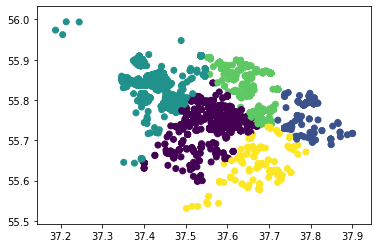

In [15]:
kmeans_agreed = KMeans(n_clusters = 5)
clusters_agreed = kmeans_agreed.fit_predict(agreed)

plt.scatter(agreed.x, agreed.y, c=clusters_agreed)
plt.show()

In [16]:
### Скопления голосов против
disagreed = data[data.comment_class == -1]
disagreed.head()

,Unnamed: 0,Unnamed: 0.1,x,y,comment_class
0,0,0,37.612416,55.777454,-1
1,1,1,37.612416,55.777454,-1
2,2,2,37.603298,55.742108,-1
3,3,3,37.558526,55.728758,-1
4,4,4,37.566431,55.731794,-1


In [17]:
disagreed = disagreed[['x', 'y']]

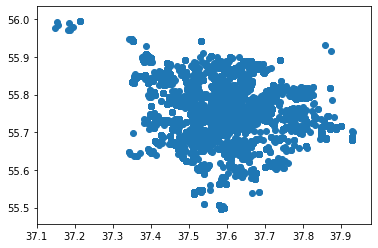

In [18]:
plt.scatter(disagreed.x, disagreed.y)

In [19]:
k_disagreed = []
ks_disagreed = range(1,11)

for k in ks_disagreed:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(disagreed)
    k_disagreed.append(clf_kmeans.inertia_)

diff_disagreed = np.diff(k_disagreed)
diff_r_disagreed = diff_disagreed[1:] / diff_disagreed[:-1]
    
k_opt_disagreed = ks_disagreed[np.argmin(diff_r_disagreed)+1]
k_opt_disagreed

4

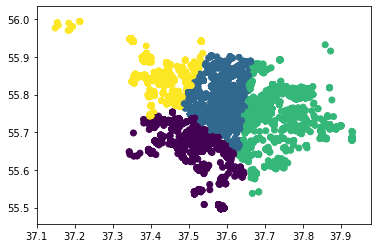

In [20]:
### Строим график при оптимальном числе кластеров против - 4
kmeans_disagreed = KMeans(n_clusters = 4)
clusters_disagreed = kmeans_disagreed.fit_predict(disagreed)

plt.scatter(disagreed.x, disagreed.y, c=clusters_disagreed)
plt.show()